## Bibliotecas

In [550]:
# Manipulação de dados
import pandas as pd
from datetime import datetime

# Visualização de dados
import matplotlib.pyplot as plt

# Ignorar avisos
import warnings
warnings.filterwarnings('ignore')

## Leitura da base

In [551]:
# Importa a base de dados em parquet
df = pd.read_parquet('arquivos/data_tratada.parquet')

In [552]:
df.head(3)

,id,birth_date,created_at,deleted_at,last_date_purchase,status,recency,state,marketing_source,version,average_ticket,all_orders,all_revenue,items_quantity
0,8bf7960e-3b93-468b-856e-6c6c5b56f52b,1974-07-10,2017-08-15 07:05:00,NaT,01/14/21 11:23 AM,active,35,AM,crm,2.31.7,151.142942,6,906.857651,10
1,a39535b5-4647-4680-b4f6-3aed57c1f1ff,1940-07-06,2019-12-31 21:53:00,NaT,01/08/21 11:23 AM,paused,41,RR,organic_search,3.30.12,236.991790,1,236.991790,4
2,dc067cd2-c021-42bd-8c0e-beb267280e66,1963-03-18,2019-03-07 23:46:00,NaT,01/07/21 11:23 AM,active,42,RR,organic_search,3.28.9,211.955597,11,2331.511572,13


## Análises

In [553]:
# Cria função para plotar gráficos de barras
def plot_bar_chart(data, column, title):
    # Filtrar apenas os churns (status = "canceled")
    churn_data = data[data['status'] == 'canceled']

    # Contar o número de churns por categoria na coluna
    column_counts = churn_data[column].value_counts()

    # Configurar o tamanho da figura
    plt.figure(figsize=(12, 6))

    # Plotar o gráfico de barras
    bars = plt.bar(column_counts.index, column_counts.values, color='#571277')

    # Configurar o título e os rótulos dos eixos
    plt.title(title)
    plt.xlabel(column)
    plt.ylabel('Quantidade')

    # Exibir e rotacionar todos os rótulos no eixo x sem sobreposições
    plt.xticks(column_counts.index, rotation=45, ha='right')

    # Adicionar os números acima das barras
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height, str(height),
                 ha='center', va='bottom', fontsize=10)

    # Exibir o gráfico
    plt.show()
    print(column_counts)

### Como nosso churn se comporta mês a mês?
Informações de churn por mês, ordenado pela data. Teremos três colunas: "churn_month" (contagem de churns), "churn_count" (número de assinaturas canceladas) e "churn_rate" (taxa de churn por mês). Essas informações permitirão uma análise mais estruturada dos dados de churn ao longo do tempo.

In [554]:
# Extrair o mês e o ano da coluna "deleted_at"
df['churn_month'] = df['deleted_at'].dt.to_period('M')

# Contar o número de assinaturas canceladas em cada mês
churn_count = df['churn_month'].value_counts().reset_index()
churn_count.columns = ['churn_month', 'churn_count']

# Ordenar o DataFrame por data
churn_count = churn_count.sort_values(by='churn_month')


### Como nosso churn se comporta de acordo com o mês e ano?

In [555]:
# Extrair mês e ano da data
df['mes'] = pd.to_datetime( df['deleted_at'] ).dt.month
df['ano'] = pd.to_datetime( df['deleted_at'] ).dt.year

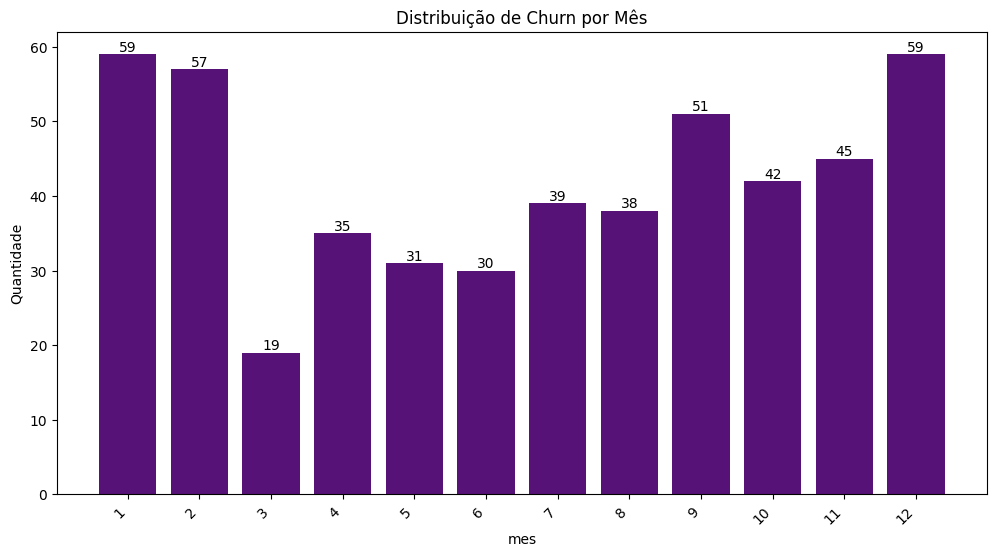

mes
12.0    59
1.0     59
2.0     57
9.0     51
11.0    45
10.0    42
7.0     39
8.0     38
4.0     35
5.0     31
6.0     30
3.0     19
Name: count, dtype: int64


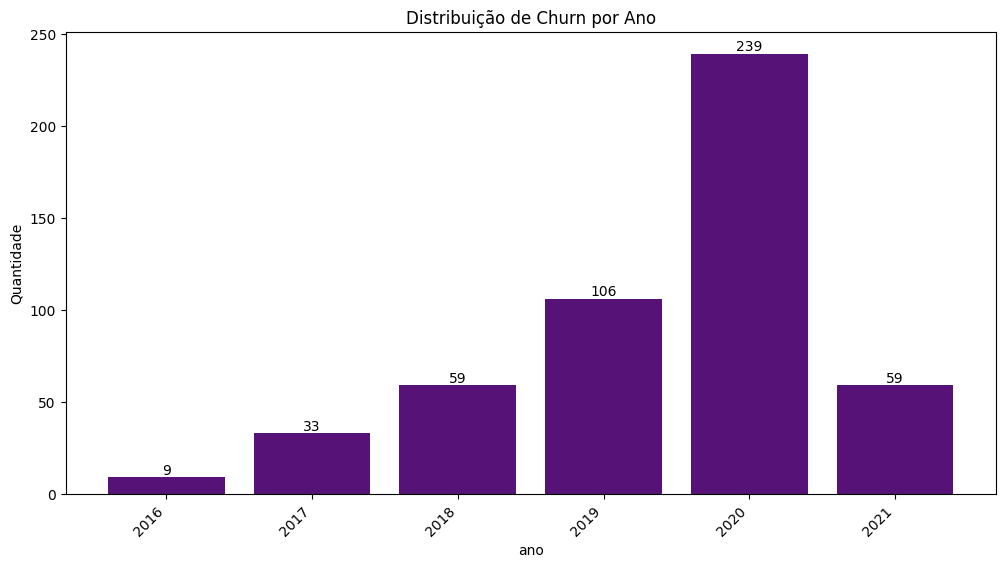

ano
2020.0    239
2019.0    106
2018.0     59
2021.0     59
2017.0     33
2016.0      9
Name: count, dtype: int64


In [556]:
plot_bar_chart(df, 'mes', 'Distribuição de Churn por Mês')
plot_bar_chart(df, 'ano', 'Distribuição de Churn por Ano')

### Como nosso churn se comporta de acordo com a versão da assinatura?

In [557]:
# Extrair o primeiro número da versão
df['major_version'] = df['version'].str.split('.').str[0].astype(int)

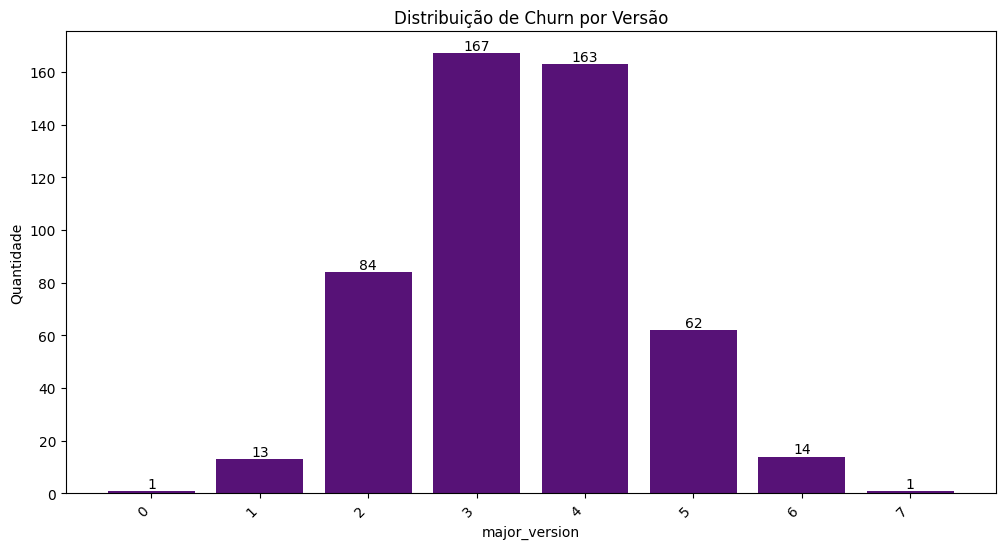

major_version
3    167
4    163
2     84
5     62
6     14
1     13
0      1
7      1
Name: count, dtype: int64


In [558]:
plot_bar_chart(df, 'major_version', 'Distribuição de Churn por Versão')

### Como nosso churn se comporta de acordo com o canal de vendas?

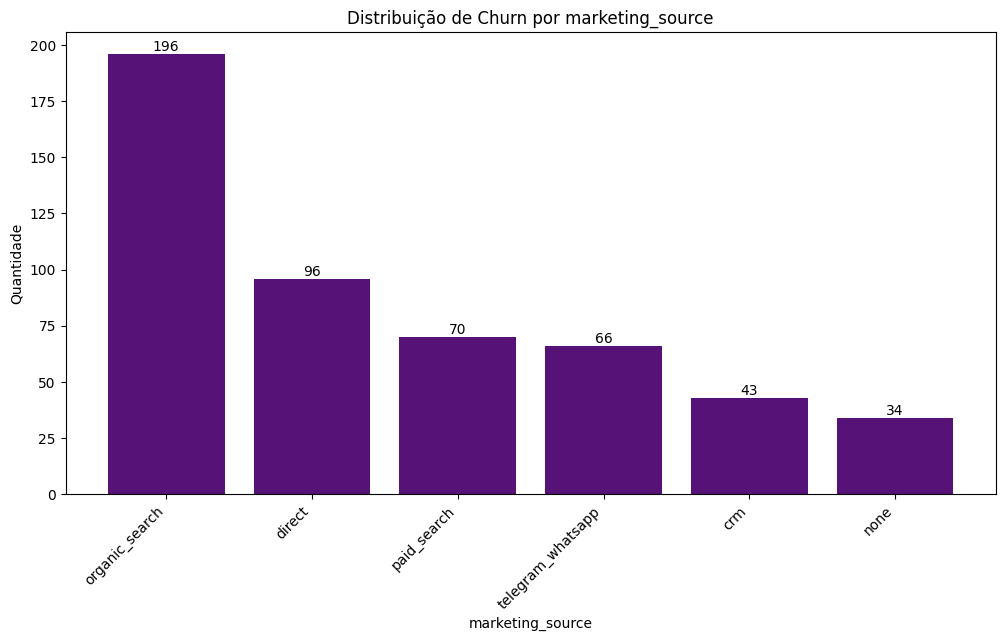

marketing_source
organic_search       196
direct                96
paid_search           70
telegram_whatsapp     66
crm                   43
none                  34
Name: count, dtype: int64


In [559]:
plot_bar_chart(df, 'marketing_source', 'Distribuição de Churn por marketing_source')

### Como nosso churn se comporta de acordo com a faixa etária do cliente?

In [560]:
# Calcular a idade dos clientes em anos com base na data de nascimento corrigida
current_date = pd.to_datetime('today')
df['idade'] = ((current_date - df['birth_date']).dt.days / 365).astype(int)

# Definir as faixas etárias
faixa_etaria_bins = [0, 30, 45, 55, 65, 75, 120]
faixa_etaria_labels = ['<31', '31-45', '46-55', '56-65', '66-75', '75+']
df['faixa_etaria'] = pd.cut(df['idade'], bins=faixa_etaria_bins, labels=faixa_etaria_labels)

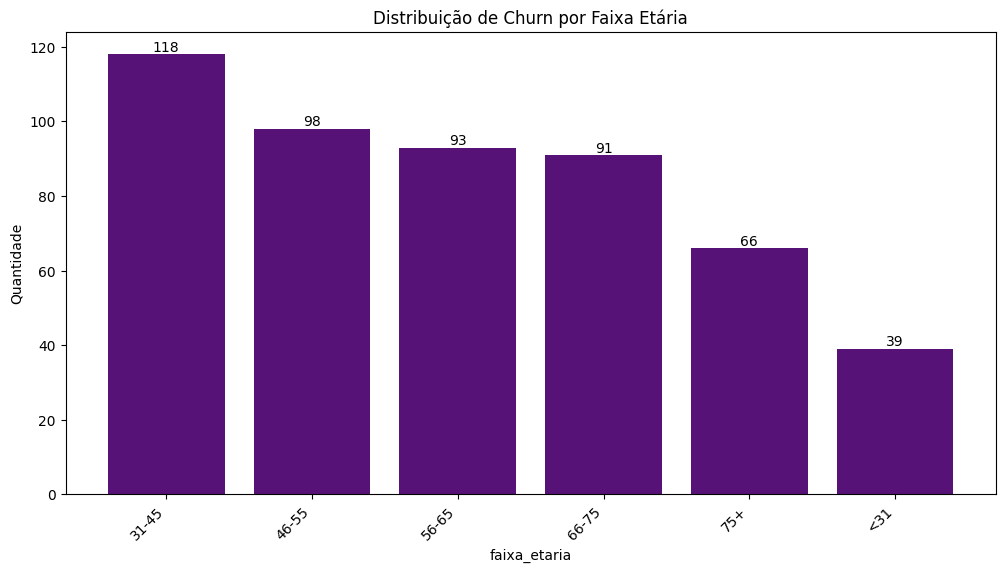

faixa_etaria
31-45    118
46-55     98
56-65     93
66-75     91
75+       66
<31       39
Name: count, dtype: int64


In [561]:
plot_bar_chart(df, 'faixa_etaria', 'Distribuição de Churn por Faixa Etária')

### Como nosso churn se comporta de acordo com o estado do cliente?

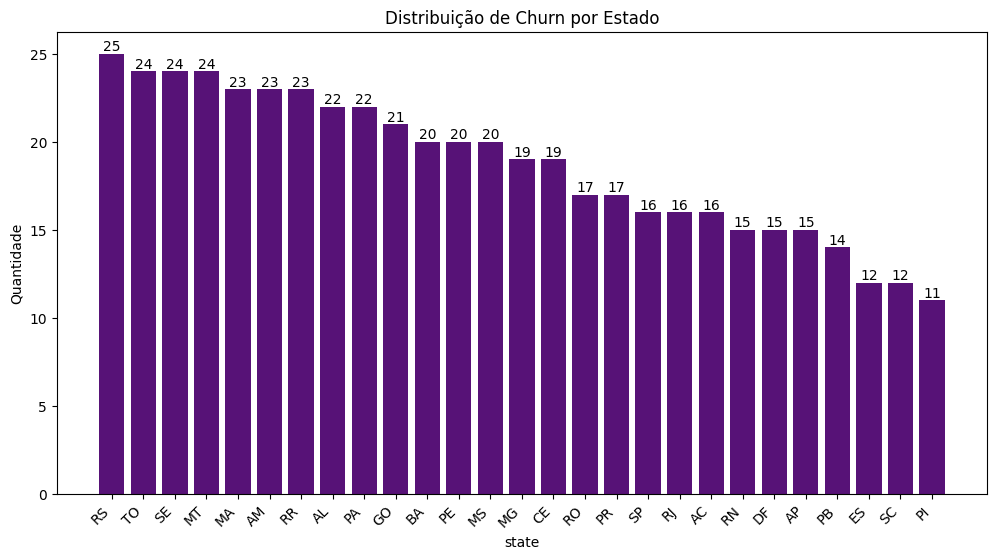

state
RS    25
TO    24
SE    24
MT    24
MA    23
AM    23
RR    23
AL    22
PA    22
GO    21
BA    20
PE    20
MS    20
MG    19
CE    19
RO    17
PR    17
SP    16
RJ    16
AC    16
RN    15
DF    15
AP    15
PB    14
ES    12
SC    12
PI    11
Name: count, dtype: int64


In [562]:
plot_bar_chart(df, 'state', 'Distribuição de Churn por Estado')

In [563]:
a

NameError: name 'a' is not defined

In [ ]:
# Filtrar clientes que churnaram e calcular a média de gasto por pedido
media_gasto_churn = df[df['status'] == 'canceled']['average_ticket'].mean()

# Filtrar clientes que não churnaram e calcular a média de gasto por pedido
media_gasto_nao_churn = df[df['status'] != 'canceled']['average_ticket'].mean()

# Exibir as médias de gasto por pedido
print("Média de Gasto por Pedido (Churn):", media_gasto_churn)
print("Média de Gasto por Pedido (Não Churn):", media_gasto_nao_churn)



Média de Gasto por Pedido (Churn): 217.43850146117575
Média de Gasto por Pedido (Não Churn): 216.86578691189317


In [ ]:
display(correlation_media_gasto)

,average_ticket
average_ticket,1.0


In [ ]:
a

NameError: name 'a' is not defined

In [ ]:
# Extrair o mês e o ano da coluna "deleted_at"
df['churn_month'] = df['deleted_at'].dt.to_period('M')

# Contar o número de assinaturas canceladas em cada mês
churn_count = df['churn_month'].value_counts().reset_index()
churn_count.columns = ['churn_month', 'churn_count']

# Calcular a taxa de churn por mês
total_customers = len(df['id'].unique())
churn_count['churn_rate'] = churn_count['churn_count'] / total_customers

# Ordenar o DataFrame por data
churn_count = churn_count.sort_values(by='churn_month')

# Exibir o resultado
display(churn_count)

,churn_month,churn_count,churn_rate
47,2016-05,1,0.0001
51,2016-06,1,0.0001
41,2016-08,3,0.0003
45,2016-09,2,0.0002
49,2016-10,1,0.0001
48,2016-12,1,0.0001
44,2017-01,2,0.0002
52,2017-03,1,0.0001
33,2017-04,4,0.0004
53,2017-05,1,0.0001
